# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [17]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [18]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 586


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [19]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units=metric&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp =  city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hadithah
Processing Record 2 of Set 1 | olonkinbyen
Processing Record 3 of Set 1 | waitangi
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | tura
Processing Record 6 of Set 1 | adamstown
Processing Record 7 of Set 1 | hawaiian paradise park
Processing Record 8 of Set 1 | blackmans bay
Processing Record 9 of Set 1 | mata de sao joao
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | taksimo
Processing Record 12 of Set 1 | sona
Processing Record 13 of Set 1 | laguna
Processing Record 14 of Set 1 | greymouth
Processing Record 15 of Set 1 | qaqortoq
Processing Record 16 of Set 1 | anadyr
Processing Record 17 of Set 1 | ribeira grande
Processing Record 18 of Set 1 | tidjikja
Processing Record 19 of Set 1 | taiohae
City not found. Skipping...
Processing Record 20 of Set 1 | zyryanskoye
Processing Record 21 of Set 1 | thompson
Processing Record 22 of S

Processing Record 41 of Set 4 | kerikeri
Processing Record 42 of Set 4 | saint-francois
Processing Record 43 of Set 4 | bastia
Processing Record 44 of Set 4 | mpanda
Processing Record 45 of Set 4 | priob'ye
Processing Record 46 of Set 4 | sangola
Processing Record 47 of Set 4 | camana
Processing Record 48 of Set 4 | notodden
Processing Record 49 of Set 4 | cole harbour
Processing Record 0 of Set 5 | port alfred
Processing Record 1 of Set 5 | papatowai
Processing Record 2 of Set 5 | cockburn town
Processing Record 3 of Set 5 | guarapari
Processing Record 4 of Set 5 | itoman
Processing Record 5 of Set 5 | kemalpasa
Processing Record 6 of Set 5 | hermanus
Processing Record 7 of Set 5 | hyderabad
Processing Record 8 of Set 5 | i-n-salah
Processing Record 9 of Set 5 | kailua-kona
Processing Record 10 of Set 5 | buala
Processing Record 11 of Set 5 | limon
Processing Record 12 of Set 5 | shingu
Processing Record 13 of Set 5 | pathein
Processing Record 14 of Set 5 | tenenkou
Processing Record 

Processing Record 32 of Set 8 | padang
Processing Record 33 of Set 8 | egilsstadir
Processing Record 34 of Set 8 | chulakkurgan
Processing Record 35 of Set 8 | governor's harbour
City not found. Skipping...
Processing Record 36 of Set 8 | saynshand
Processing Record 37 of Set 8 | tutong
Processing Record 38 of Set 8 | wa
City not found. Skipping...
Processing Record 39 of Set 8 | motueka
Processing Record 40 of Set 8 | san clemente del tuyu
Processing Record 41 of Set 8 | robertsport
Processing Record 42 of Set 8 | kayenta
Processing Record 43 of Set 8 | talnakh
Processing Record 44 of Set 8 | sefwi wiawso
City not found. Skipping...
Processing Record 45 of Set 8 | nuuk
Processing Record 46 of Set 8 | quellon
Processing Record 47 of Set 8 | chonchi
Processing Record 48 of Set 8 | koulikoro
Processing Record 49 of Set 8 | kudymkar
Processing Record 0 of Set 9 | new norfolk
Processing Record 1 of Set 9 | mikuni
Processing Record 2 of Set 9 | xindian
Processing Record 3 of Set 9 | chos ma

Processing Record 21 of Set 12 | sarmiento
Processing Record 22 of Set 12 | kutum
Processing Record 23 of Set 12 | luau
Processing Record 24 of Set 12 | formosa do rio preto
Processing Record 25 of Set 12 | port blair
Processing Record 26 of Set 12 | boden
Processing Record 27 of Set 12 | polyarnyy
Processing Record 28 of Set 12 | boguchany
Processing Record 29 of Set 12 | el daein
City not found. Skipping...
Processing Record 30 of Set 12 | mirnyy
Processing Record 31 of Set 12 | kittila
Processing Record 32 of Set 12 | ad douiem
Processing Record 33 of Set 12 | kenai
Processing Record 34 of Set 12 | luderitz
Processing Record 35 of Set 12 | kone
-----------------------------
Data Retrieval Complete      
-----------------------------


In [ ]:
city_data

In [20]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          558
Lat           558
Lng           558
Max Temp      558
Humidity      558
Cloudiness    558
Wind Speed    558
Country       558
Date          558
dtype: int64

In [21]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hadithah,34.1397,42.3781,27.07,26,100,3.20,IQ,1681932547
1,olonkinbyen,70.9221,-8.7187,1.90,90,3,7.54,SJ,1681932403
2,waitangi,-43.9535,-176.5597,16.57,93,100,3.58,NZ,1681932410
3,ushuaia,-54.8000,-68.3000,9.79,81,75,12.35,AR,1681932312
4,tura,25.5198,90.2201,26.66,61,51,4.12,IN,1681932466


In [22]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [23]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hadithah,34.1397,42.3781,27.07,26,100,3.20,IQ,1681932547
1,olonkinbyen,70.9221,-8.7187,1.90,90,3,7.54,SJ,1681932403
2,waitangi,-43.9535,-176.5597,16.57,93,100,3.58,NZ,1681932410
3,ushuaia,-54.8000,-68.3000,9.79,81,75,12.35,AR,1681932312
4,tura,25.5198,90.2201,26.66,61,51,4.12,IN,1681932466


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

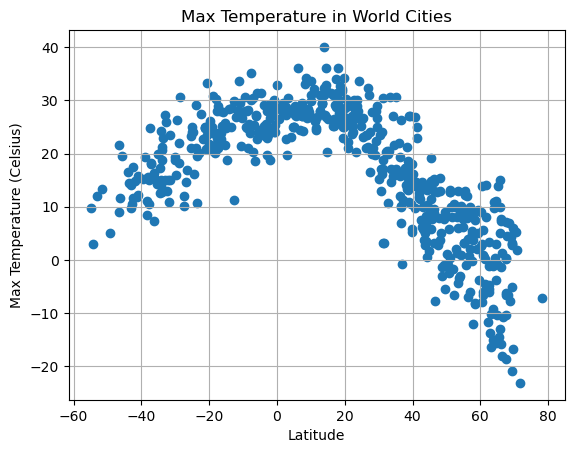

In [24]:
# Build scatter plot for latitude vs. temperature
lav_vs_temp_scatter = plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("Max Temperature in World Cities")
plt.ylabel("Max Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

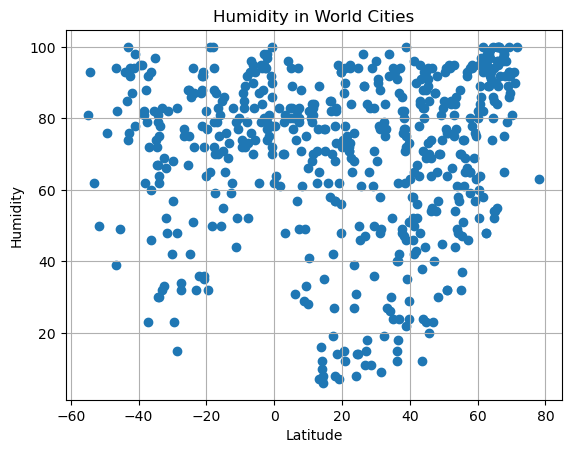

In [25]:
# Build the scatter plots for latitude vs. humidity
lav_vs_humidity_scatter = plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Humidity in World Cities")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

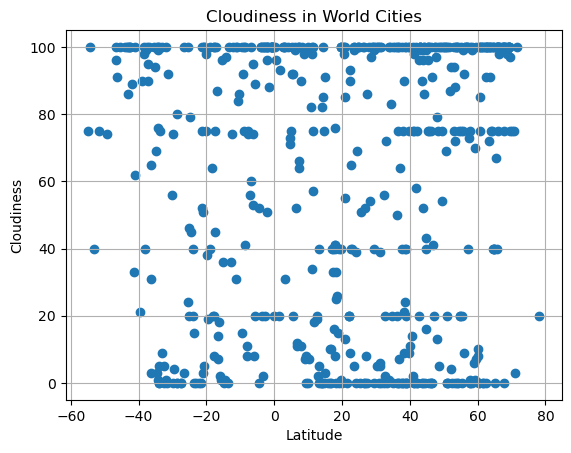

In [26]:
# Build the scatter plots for latitude vs. cloudiness
lat_vs_cloudiness_scatter = plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Cloudiness in World Cities")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

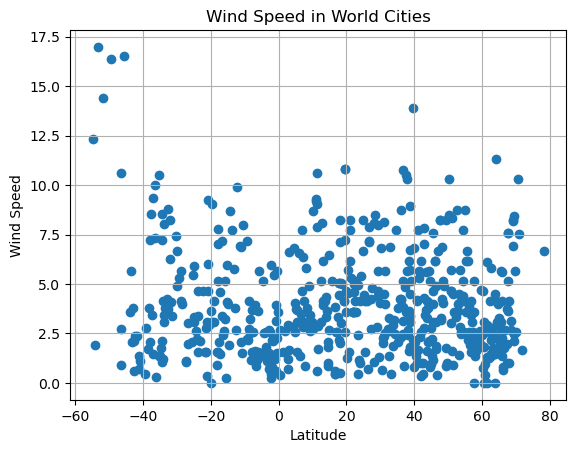

In [27]:
# Build the scatter plots for latitude vs. wind speed
lat_vs_wind_scatter = plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("Wind Speed in World Cities")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [88]:
# Define a function to create Linear Regression plots
def get_regression_plot(x_values,y_values):
    plt.scatter(x_values,y_values)
    plt.xlabel(x_values.name)
    plt.ylabel(y_values.name)
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,xy=(0, 1), xytext=(5, -5), va='top',
             xycoords='axes fraction', textcoords='offset points',fontsize=15,color="red")
    print(f"The r-value is: {rvalue}")
    plt.show()

In [78]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hadithah,34.1397,42.3781,27.07,26,100,3.20,IQ,1681932547
1,olonkinbyen,70.9221,-8.7187,1.90,90,3,7.54,SJ,1681932403
4,tura,25.5198,90.2201,26.66,61,51,4.12,IN,1681932466
6,hawaiian paradise park,19.5933,-154.9731,24.94,93,40,7.20,US,1681932414
10,taksimo,56.3444,114.8794,-7.00,69,100,1.91,RU,1681932550


In [79]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,waitangi,-43.9535,-176.5597,16.57,93,100,3.58,NZ,1681932410
3,ushuaia,-54.8000,-68.3000,9.79,81,75,12.35,AR,1681932312
5,adamstown,-25.0660,-130.1015,24.91,75,46,3.33,PN,1681932131
7,blackmans bay,-43.0167,147.3167,9.85,74,86,3.80,AU,1681932412
8,mata de sao joao,-12.5303,-38.2992,29.86,62,74,2.69,BR,1681932549


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8637504740704951


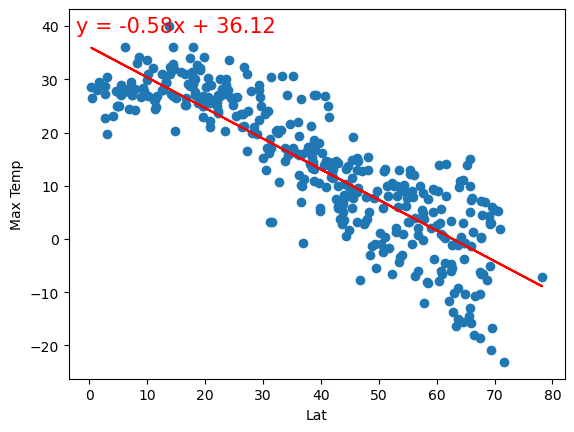

In [89]:
# Linear regression on Northern Hemisphere
get_regression_plot(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'])

The r-value is: 0.7350712084219082


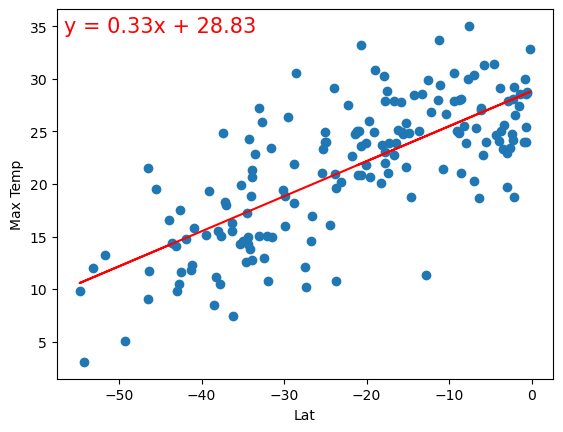

In [90]:
# Linear regression on Southern Hemisphere
get_regression_plot(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'])

**Discussion about the linear relationship:** 

-As City location is closer to the equator (0 degrees latitude) cities tend to have a higher max temperature. This is true in both hemispheres. This is a very strong correlation in the data. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.2733003113293434


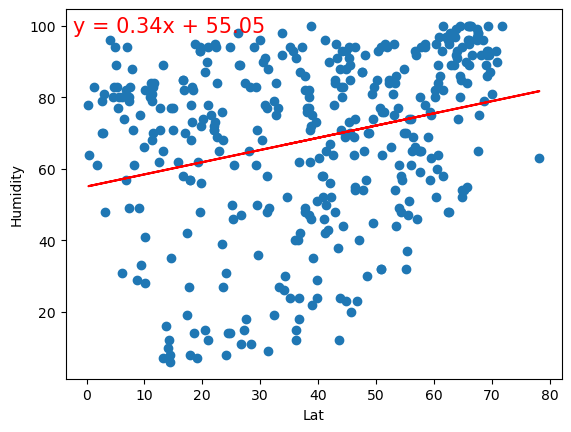

In [91]:
# Northern Hemisphere
get_regression_plot(northern_hemi_df['Lat'],northern_hemi_df['Humidity'])

The r-value is: 0.18655293033171755


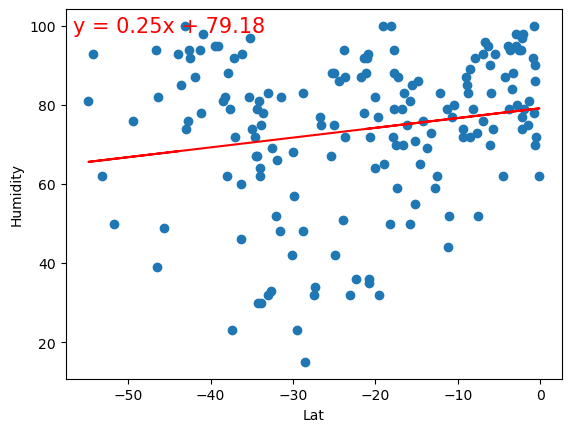

In [92]:
# Southern Hemisphere
get_regression_plot(southern_hemi_df['Lat'],southern_hemi_df['Humidity'])

**Discussion about the linear relationship:** 
- In both hemisphere's there is a slight correlation between latitude and Humidity.
- However, The northern hemisphere humidity tends to increase as you get further from the equator
- In the souther hemisphere humidity increases as you get closer to the equator

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.16781622929471887


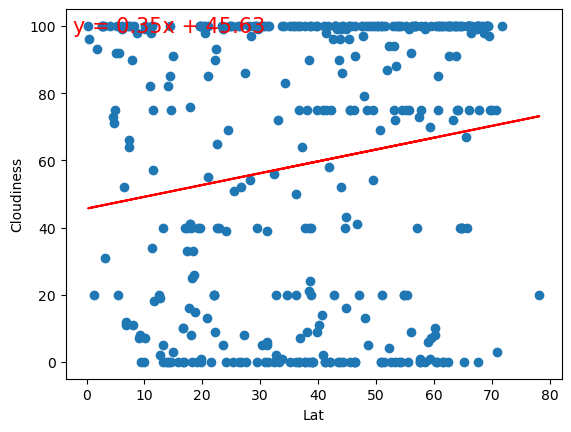

In [93]:
# Northern Hemisphere
get_regression_plot(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'])

The r-value is: 0.006408388440713621


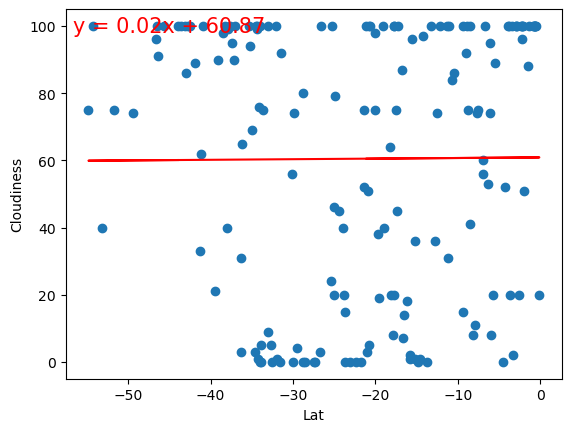

In [94]:
# Southern Hemisphere
get_regression_plot(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'])

**Discussion about the linear relationship:**
- There appears to be no correlation between cloudiness and latitude. The northern hemisphere has slightly more data leaning towards a correlation, but not very strong. 
- The data is pretty spread out without much pattern. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.07450562354914012


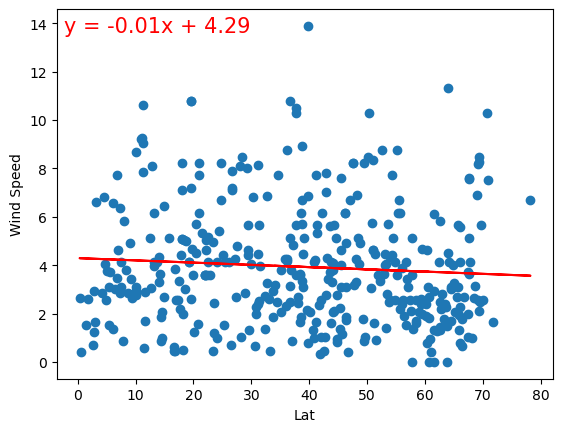

In [95]:
# Northern Hemisphere
get_regression_plot(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'])

The r-value is: -0.33537959101566384


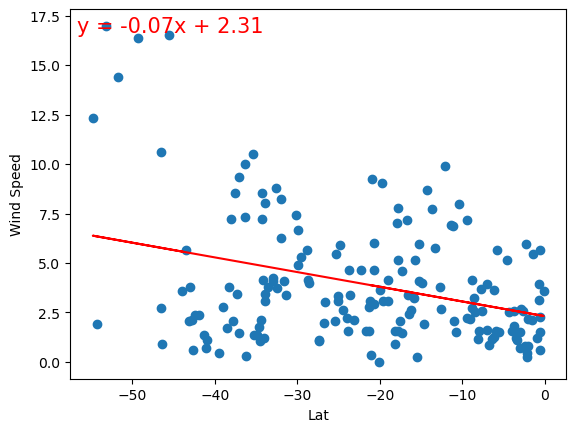

In [96]:
# Southern Hemisphere
get_regression_plot(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'])

**Discussion about the linear relationship:**
- There does not appear to be a strong correlation in the northern hemisphere. the data seems to be consistently spread in terms of wind speed as latitude changes
- However, in the southern hemisphere there is a correlation that as you get closer to the equator windspeeds to appear to be lower. However, this relationship is not very strong. 